In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.6 MB/s eta 0:00:00


In [ ]:
from deap import base, algorithms
from deap import creator
from deap import tools

import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
inf = 100
D = ((0, 3, 1, 3, inf, inf),
     (3, 0, 4, inf, inf, inf),
     (1, 4, 0, inf, 7, 5),
     (3, inf, inf, 0, inf, 2),
     (inf, inf, 7, inf, 0, 4),
     (inf, inf, 5, 2, 4, 0))

In [ ]:
startV = 0              # стартовая вершина
LENGTH_D = len(D)
LENGTH_CHROM = len(D)*len(D[0])    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 500   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.1        # вероятность мутации индивидуума
MAX_GENERATIONS = 30    # максимальное количество поколений

In [ ]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()
toolbox.register("randomOrder", random.sample, range(LENGTH_D), LENGTH_D)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.randomOrder, LENGTH_D)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [ ]:
population = toolbox.populationCreator(n=POPULATION_SIZE)

In [ ]:
def dikstryFitness(individual):
    s = 0
    for n, path in enumerate(individual):
        path = path[:path.index(n)+1]

        si = startV
        for j in path:
            s += D[si][j]
            si = j

    return s,         # кортеж

In [ ]:
def cxOrdered(ind1, ind2):
    for p1, p2 in zip(ind1, ind2):
        tools.cxOrdered(p1, p2)

    return ind1, ind2

In [ ]:
def mutShuffleIndexes(individual, indpb):
    for ind in individual:
        tools.mutShuffleIndexes(ind, indpb)

    return individual,

In [ ]:
toolbox.register("evaluate", dikstryFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", cxOrdered)
toolbox.register("mutate", mutShuffleIndexes, indpb=1.0/LENGTH_CHROM/10)

In [ ]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

In [ ]:
population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER/LENGTH_D,
                                        mutpb=P_MUTATION/LENGTH_D,
                                        ngen=MAX_GENERATIONS,
                                        stats=stats,
                                        verbose=True)

gen	nevals	min	avg   
0  	500   	117	936.65
1  	96    	237	715.968
2  	73    	225	568.376
3  	84    	126	467.172
4  	73    	126	374.85 
5  	76    	126	326.972
6  	91    	120	294.41 
7  	70    	120	241.22 
8  	80    	115	239.638
9  	83    	29 	211.436
10 	70    	26 	170.214
11 	94    	20 	133.544
12 	58    	20 	117.79 
13 	66    	20 	99.71  
14 	98    	20 	84.82  
15 	78    	20 	51.764 
16 	76    	20 	38.866 
17 	75    	20 	32.388 
18 	65    	20 	29.43  
19 	51    	20 	27.752 
20 	93    	20 	28.27  
21 	77    	20 	26.272 
22 	95    	20 	29.194 
23 	90    	20 	26.692 
24 	67    	20 	28.712 
25 	88    	20 	29.792 
26 	91    	20 	26.7   
27 	97    	20 	29.182 
28 	101   	20 	28.978 
29 	78    	20 	24.992 
30 	87    	20 	33.272 


In [ ]:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

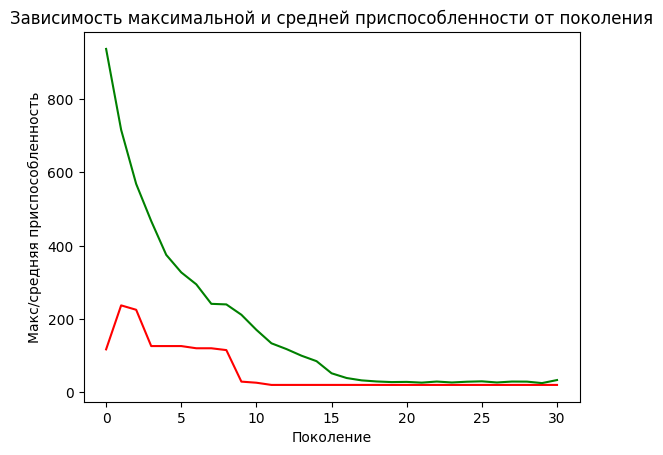

In [ ]:
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')

plt.show()

In [ ]:
HALL_OF_FAME_SIZE = 1

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

In [ ]:
population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER/LENGTH_D,
                                        mutpb=P_MUTATION/LENGTH_D,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        verbose=True)

gen	nevals	min	avg   
0  	0     	20 	33.272
1  	83    	20 	24.824
2  	97    	20 	25.15 
3  	69    	20 	28.196
4  	96    	20 	29.124
5  	65    	20 	25.336
6  	63    	20 	24.094
7  	72    	20 	24.116
8  	81    	20 	25.202
9  	75    	20 	20    
10 	81    	20 	21.036
11 	74    	20 	23.348
12 	81    	20 	25.482
13 	101   	20 	26.918
14 	65    	20 	23.134
15 	76    	20 	21.036
16 	71    	20 	27.842
17 	94    	20 	25.386
18 	87    	20 	22.092
19 	73    	20 	26.288
20 	71    	20 	28.29 
21 	84    	20 	25.492
22 	78    	20 	23.538
23 	91    	20 	25.382
24 	79    	20 	21.034
25 	70    	20 	25.096
26 	92    	20 	22.742
27 	93    	20 	25.898
28 	92    	20 	28.012
29 	74    	20 	27.41 
30 	105   	20 	21.036


In [ ]:
best = hof.items[0]
print(best)

[[0, 1, 4, 3, 5, 2], [1, 4, 3, 0, 5, 2], [2, 0, 5, 1, 4, 3], [3, 2, 4, 5, 1, 0], [2, 4, 1, 5, 3, 0], [3, 5, 1, 4, 0, 2]]


In [ ]:
from matplotlib.lines import Line2D

vertex = ((0, 1), (1, 1), (0.5, 0.8), (0.1, 0.5), (0.8, 0.2), (0.4, 0))

vx = [v[0] for v in vertex]
vy = [v[1] for v in vertex]

def show_graph(ax, best):
    ax.add_line(Line2D((vertex[0][0], vertex[1][0]), (vertex[0][1], vertex[1][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[0][0], vertex[2][0]), (vertex[0][1], vertex[2][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[0][0], vertex[3][0]), (vertex[0][1], vertex[3][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[1][0], vertex[2][0]), (vertex[1][1], vertex[2][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[2][0], vertex[5][0]), (vertex[2][1], vertex[5][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[2][0], vertex[4][0]), (vertex[2][1], vertex[4][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[3][0], vertex[5][0]), (vertex[3][1], vertex[5][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[4][0], vertex[5][0]), (vertex[4][1], vertex[5][1]), color='#aaa'))

    startV = 0
    for i, v in enumerate(best):
        if i == 0:
            continue

        prev = startV
        v = v[:v.index(i)+1]
        for j in v:
            ax.add_line(Line2D((vertex[prev][0], vertex[j][0]), (vertex[prev][1], vertex[j][1]), color='r'))
            prev = j

    ax.plot(vx, vy, ' ob', markersize=15)

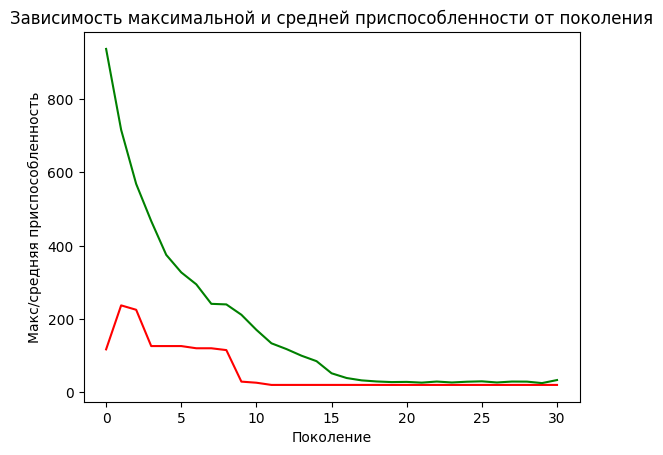

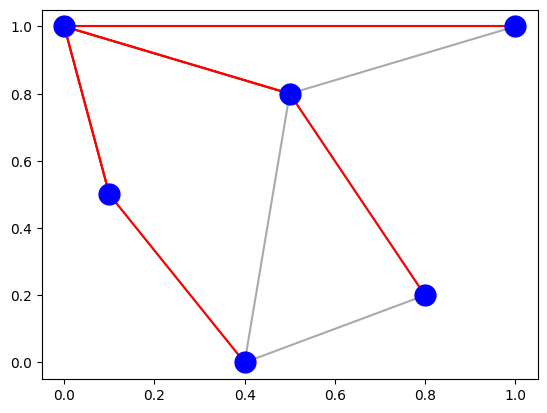

In [ ]:
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')

fig, ax = plt.subplots()
show_graph(ax, best)
plt.show()